In [1]:
import brainsss
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
import scipy
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
import matplotlib as mpl
from matplotlib.pyplot import cm
import random
from scipy.stats import sem
import time
import h5py
import ants
import nibabel as nib
import matplotlib
from scipy.ndimage import gaussian_filter1d

/home/users/yandanw/.local/lib/python3.6/site-packages/ants/viz/render_surface_function.py:16: UserWarning:

Cant import Plotly. Install it `pip install chart_studio` if you want to use ants.render_surface_function



In [2]:
from sklearn.feature_extraction import image
import imageio
from tqdm import tqdm
import argparse
import subprocess
import time
from scipy.ndimage import gaussian_filter1d
import bigbadbrain as bbb
import dataflow as flow
import brainsss
import fcntl

In [3]:
class Printlog():
    '''
    for printing all processes into same log file on sherlock
    '''
    def __init__(self, logfile):
        self.logfile = logfile
    def print_to_log(self, message):
        with open(self.logfile, 'a+') as f:
            fcntl.flock(f, fcntl.LOCK_EX)
            f.write(message)
            f.write('\n')
            fcntl.flock(f, fcntl.LOCK_UN)

In [9]:
image = cluster_model_labels[0].reshape(256, 128)

In [1]:
image.shape

NameError: name 'image' is not defined

In [21]:
cluster_model_labels[20]

array([1844, 1844, 1844, ..., 1420, 1420, 1420])

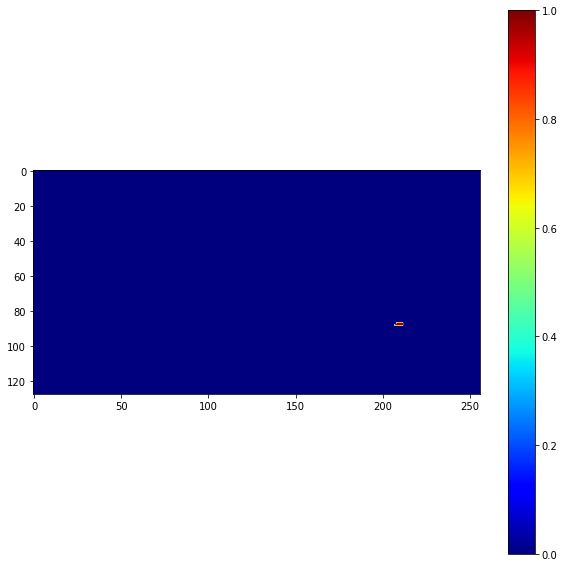

In [20]:
image = cluster_model_labels[20].reshape(256, 128)

empty = np.zeros((256,128))

empty[np.where(image == 1000)] = 1
# Visualize the image
plt.figure(figsize=(10,10))
plt.imshow(empty.T, cmap='jet')
plt.colorbar()
plt.show()

In [ ]:
###########################
### PREP VISUAL STIMULI ###
###########################

#vision_path = os.path.join(func_path, 'visual')
### Load Photodiode ###
#t, ft_triggers, pd1, pd2 = brainsss.load_photodiode(vision_path)
#stimulus_start_times = brainsss.extract_stim_times_from_pd(pd2, t)
### Unifrom the units and Make then intigers ###
#stimulus_start_times = (stimulus_start_times*100).astype('int') #index needs to be an integers

In [4]:
for z in tqdm(range(49)):
    print(f'===== z: {z} =====')
    ###############################################
    ### Parse the dictionary of input arguments ###
    ###############################################

    logfile = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly/log.log"
    save_directory = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly"

    ### this pringlogging is custom to our system
    printlog = getattr(Printlog(logfile=logfile), 'print_to_log')
    printlog('{}'.format(z))

    fly_names = ['fly_287', 'fly_308', 'fly_309', 'fly_311']
    dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"
    expt_len = 1000*30*60
    resolution = 10
    high_res_timepoints = np.arange(0,expt_len,resolution) #0 to last time at subsample res
    #######################
    ### Load Superslice ###
    #######################
    ### A superslice is a single z-plane but all flies have already been concatenated along an axis of this array
    brain_file = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly/stack{}.npy".format(z)
    brain = np.array(np.load(brain_file), copy=True)
    # Delete a fly that is in the superslice but was excluded from all analysis due to not passing quality control
    # fly_idx_delete = 3 #(fly_095)
    # brain = np.delete(brain, fly_idx_delete, axis=-1) #### DELETING FLY_095 ####

    #####################
    ### Load Clusters ###
    #####################

    # these are the supervoxels
    n_clusters = 2000
    labels_file = '/oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly/cluster_labels.npy'
    cluster_model_labels = np.load(labels_file)
    cluster_model_labels = cluster_model_labels[z,:]
    
    #######################
    ## Load SuperFictrac ##
    #######################
    fictrac_file = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly/z{}_pooled_behavior.npy".format(z)
    fictrac = np.load(fictrac_file, allow_pickle=True).item()

  0%|          | 0/49 [00:00<?, ?it/s]

===== z: 0 =====


  2%|▏         | 1/49 [00:08<06:57,  8.69s/it]

===== z: 1 =====


  4%|▍         | 2/49 [00:16<06:25,  8.20s/it]

===== z: 2 =====


  4%|▍         | 2/49 [00:24<09:41, 12.37s/it]


KeyboardInterrupt: 

In [4]:
### LUKE DEBUG ###

all_slices = []
for z in tqdm(range(91)):

    print(f'===== z: {z} =====')
    ###############################################
    ### Parse the dictionary of input arguments ###
    ###############################################

    logfile = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/moco_highpass_dff/aggregated_fly/log.log"
    save_directory = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/moco_highpass_dff/aggregated_fly"

    ### this pringlogging is custom to our system
    printlog = getattr(Printlog(logfile=logfile), 'print_to_log')
    printlog('{}'.format(z))

    fly_names = ['fly_287', 'fly_308', 'fly_309', 'fly_311']
    dataset_path = "/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset"
    expt_len = 1000*30*60
    resolution = 10
    high_res_timepoints = np.arange(0,expt_len,resolution) #0 to last time at subsample res
    #######################
    ### Load Superslice ###
    #######################
    ### A superslice is a single z-plane but all flies have already been concatenated along an axis of this array
    brain_file = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/moco_highpass_dff/aggregated_fly/stack{}.npy".format(z)
    brain = np.array(np.load(brain_file), copy=True)
    # Delete a fly that is in the superslice but was excluded from all analysis due to not passing quality control
    # fly_idx_delete = 3 #(fly_095)
    # brain = np.delete(brain, fly_idx_delete, axis=-1) #### DELETING FLY_095 ####

#     #####################
#     ### Load Clusters ###
#     #####################

#     # these are the supervoxels
#     n_clusters = 2000
#     labels_file = '/oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly/darkbar_4_cluster_labels_2000.npy'
#     cluster_model_labels = np.load(labels_file)
#     cluster_model_labels = cluster_model_labels[z,:]

    #######################
    ## Load SuperFictrac ##
    #######################
    fictrac_file = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/moco_highpass_dff/aggregated_fly/z{}_pooled_behavior.npy".format(z)
    fictrac = np.load(fictrac_file, allow_pickle=True).item()

    ### Bin bar positions ###
    bins = np.arange(-180,181,30)
    #neural_z = brain.transpose([2, 0, 1, 3]).reshape(brain.shape[1], brain.shape[2], -1)
    neural_z = np.moveaxis(brain,0,-2)
    neural_z = np.reshape(neural_z,(314,146,-1))

    #heading = fictrac['h']
    heading = np.rad2deg(fictrac['h'])
    ### redefine 0
    heading = (heading + 180) % 360 - 180

    avg_neural_barposition = []
    bin_middle = []
    for i in range(len(bins)-1):
        start = bins[i]
        stop = bins[i+1]
        bin_middle.append((start+stop)/2)
        ids = np.where(np.logical_and(heading>start, heading<=stop))[0]
        avg_neural_barposition.append(np.nanmean(neural_z[:,:,ids],axis=2))

    slice_z = np.asarray(avg_neural_barposition)
    all_slices.append(slice_z)
all_slices = np.array(all_slices)
print(all_slices.shape)

  0%|          | 0/91 [00:00<?, ?it/s]

===== z: 0 =====


  1%|          | 1/91 [00:18<27:46, 18.52s/it]

===== z: 1 =====


  2%|▏         | 2/91 [00:37<28:16, 19.06s/it]

===== z: 2 =====


  3%|▎         | 3/91 [00:58<29:05, 19.84s/it]

===== z: 3 =====


  4%|▍         | 4/91 [01:17<27:57, 19.28s/it]

===== z: 4 =====


  5%|▌         | 5/91 [01:35<27:05, 18.90s/it]

===== z: 5 =====


  7%|▋         | 6/91 [01:53<26:35, 18.77s/it]

===== z: 6 =====


  8%|▊         | 7/91 [02:12<26:09, 18.69s/it]

===== z: 7 =====


  9%|▉         | 8/91 [02:30<25:48, 18.65s/it]

===== z: 8 =====


 10%|▉         | 9/91 [02:49<25:24, 18.60s/it]

===== z: 9 =====


 11%|█         | 10/91 [03:07<25:00, 18.53s/it]

===== z: 10 =====


 12%|█▏        | 11/91 [03:26<24:39, 18.50s/it]

===== z: 11 =====


 13%|█▎        | 12/91 [03:44<24:23, 18.52s/it]

===== z: 12 =====


 14%|█▍        | 13/91 [04:03<24:05, 18.53s/it]

===== z: 13 =====


 15%|█▌        | 14/91 [04:21<23:29, 18.30s/it]

===== z: 14 =====


 16%|█▋        | 15/91 [04:38<22:58, 18.14s/it]

===== z: 15 =====


 18%|█▊        | 16/91 [04:56<22:28, 17.98s/it]

===== z: 16 =====


 19%|█▊        | 17/91 [05:14<22:09, 17.96s/it]

===== z: 17 =====


 20%|█▉        | 18/91 [05:31<21:41, 17.83s/it]

===== z: 18 =====


 21%|██        | 19/91 [05:50<21:37, 18.02s/it]

===== z: 19 =====


 22%|██▏       | 20/91 [06:08<21:13, 17.94s/it]

===== z: 20 =====


 23%|██▎       | 21/91 [06:27<21:16, 18.23s/it]

===== z: 21 =====


 24%|██▍       | 22/91 [06:44<20:50, 18.13s/it]

===== z: 22 =====


 25%|██▌       | 23/91 [07:02<20:27, 18.06s/it]

===== z: 23 =====


 26%|██▋       | 24/91 [07:22<20:45, 18.60s/it]

===== z: 24 =====


 27%|██▋       | 25/91 [07:43<21:03, 19.14s/it]

===== z: 25 =====


 29%|██▊       | 26/91 [08:01<20:19, 18.76s/it]

===== z: 26 =====


 30%|██▉       | 27/91 [08:18<19:42, 18.47s/it]

===== z: 27 =====


 31%|███       | 28/91 [08:37<19:23, 18.47s/it]

===== z: 28 =====


 32%|███▏      | 29/91 [08:54<18:37, 18.03s/it]

===== z: 29 =====


 33%|███▎      | 30/91 [09:11<18:00, 17.72s/it]

===== z: 30 =====


 34%|███▍      | 31/91 [09:29<17:56, 17.94s/it]

===== z: 31 =====


 35%|███▌      | 32/91 [09:47<17:35, 17.89s/it]

===== z: 32 =====


 36%|███▋      | 33/91 [10:06<17:34, 18.18s/it]

===== z: 33 =====


 37%|███▋      | 34/91 [10:24<17:07, 18.02s/it]

===== z: 34 =====


 38%|███▊      | 35/91 [10:41<16:44, 17.93s/it]

===== z: 35 =====


 40%|███▉      | 36/91 [10:59<16:24, 17.89s/it]

===== z: 36 =====


 41%|████      | 37/91 [11:17<16:02, 17.82s/it]

===== z: 37 =====


 42%|████▏     | 38/91 [11:35<15:48, 17.90s/it]

===== z: 38 =====


 43%|████▎     | 39/91 [11:53<15:30, 17.90s/it]

===== z: 39 =====


 44%|████▍     | 40/91 [12:10<14:59, 17.63s/it]

===== z: 40 =====


 45%|████▌     | 41/91 [12:27<14:44, 17.68s/it]

===== z: 41 =====


 46%|████▌     | 42/91 [12:46<14:40, 17.96s/it]

===== z: 42 =====


 47%|████▋     | 43/91 [13:05<14:32, 18.19s/it]

===== z: 43 =====


 48%|████▊     | 44/91 [13:23<14:20, 18.30s/it]

===== z: 44 =====


 49%|████▉     | 45/91 [13:43<14:19, 18.69s/it]

===== z: 45 =====


 51%|█████     | 46/91 [14:01<13:56, 18.59s/it]

===== z: 46 =====


 52%|█████▏    | 47/91 [14:21<13:56, 19.01s/it]

===== z: 47 =====


 53%|█████▎    | 48/91 [14:40<13:38, 19.03s/it]

===== z: 48 =====


 54%|█████▍    | 49/91 [14:59<13:15, 18.94s/it]

===== z: 49 =====


 55%|█████▍    | 50/91 [15:18<12:53, 18.87s/it]

===== z: 50 =====


 56%|█████▌    | 51/91 [15:38<12:45, 19.14s/it]

===== z: 51 =====


 57%|█████▋    | 52/91 [15:56<12:18, 18.94s/it]

===== z: 52 =====


 58%|█████▊    | 53/91 [16:15<11:53, 18.79s/it]

===== z: 53 =====


 59%|█████▉    | 54/91 [16:33<11:32, 18.72s/it]

===== z: 54 =====


 60%|██████    | 55/91 [16:52<11:14, 18.73s/it]

===== z: 55 =====


 62%|██████▏   | 56/91 [17:10<10:53, 18.66s/it]

===== z: 56 =====


 63%|██████▎   | 57/91 [17:17<08:34, 15.12s/it]

===== z: 57 =====


 64%|██████▎   | 58/91 [17:36<08:55, 16.23s/it]

===== z: 58 =====


 65%|██████▍   | 59/91 [17:55<09:02, 16.95s/it]

===== z: 59 =====


 66%|██████▌   | 60/91 [18:13<09:01, 17.46s/it]

===== z: 60 =====


 67%|██████▋   | 61/91 [18:20<07:08, 14.28s/it]

===== z: 61 =====


 68%|██████▊   | 62/91 [18:39<07:34, 15.67s/it]

===== z: 62 =====


 69%|██████▉   | 63/91 [18:58<07:43, 16.56s/it]

===== z: 63 =====


 70%|███████   | 64/91 [19:16<07:44, 17.19s/it]

===== z: 64 =====


 71%|███████▏  | 65/91 [19:35<07:39, 17.67s/it]

===== z: 65 =====


 73%|███████▎  | 66/91 [19:54<07:29, 17.98s/it]

===== z: 66 =====


 74%|███████▎  | 67/91 [20:13<07:17, 18.23s/it]

===== z: 67 =====


 75%|███████▍  | 68/91 [20:33<07:12, 18.81s/it]

===== z: 68 =====


 76%|███████▌  | 69/91 [20:53<07:00, 19.13s/it]

===== z: 69 =====


 77%|███████▋  | 70/91 [21:12<06:45, 19.30s/it]

===== z: 70 =====


 78%|███████▊  | 71/91 [21:31<06:21, 19.09s/it]

===== z: 71 =====


 79%|███████▉  | 72/91 [21:50<06:00, 18.98s/it]

===== z: 72 =====


 80%|████████  | 73/91 [22:10<05:46, 19.25s/it]

===== z: 73 =====


 81%|████████▏ | 74/91 [22:28<05:23, 19.05s/it]

===== z: 74 =====


 82%|████████▏ | 75/91 [22:47<05:03, 18.94s/it]

===== z: 75 =====


 84%|████████▎ | 76/91 [23:06<04:43, 18.87s/it]

===== z: 76 =====


 85%|████████▍ | 77/91 [23:24<04:23, 18.84s/it]

===== z: 77 =====


 86%|████████▌ | 78/91 [23:43<04:04, 18.80s/it]

===== z: 78 =====


 87%|████████▋ | 79/91 [24:02<03:46, 18.84s/it]

===== z: 79 =====


 88%|████████▊ | 80/91 [24:20<03:25, 18.73s/it]

===== z: 80 =====


 89%|████████▉ | 81/91 [24:39<03:06, 18.68s/it]

===== z: 81 =====


 90%|█████████ | 82/91 [24:46<02:16, 15.13s/it]

===== z: 82 =====


 91%|█████████ | 83/91 [25:04<02:09, 16.17s/it]

===== z: 83 =====


 92%|█████████▏| 84/91 [25:12<01:34, 13.46s/it]

===== z: 84 =====


 93%|█████████▎| 85/91 [25:32<01:32, 15.41s/it]

===== z: 85 =====


 95%|█████████▍| 86/91 [25:38<01:04, 12.84s/it]

===== z: 86 =====


 96%|█████████▌| 87/91 [25:45<00:44, 11.03s/it]

===== z: 87 =====


 97%|█████████▋| 88/91 [26:04<00:39, 13.33s/it]

===== z: 88 =====


 98%|█████████▊| 89/91 [26:23<00:29, 14.92s/it]

===== z: 89 =====


 99%|█████████▉| 90/91 [26:29<00:12, 12.49s/it]

===== z: 90 =====


100%|██████████| 91/91 [26:36<00:00, 17.55s/it]

(91, 12, 314, 146)


In [5]:
save_directory

'/oak/stanford/groups/trc/data/yandan/2P_Imaging/no_zscored/aggregated_fly'

In [6]:
save_fname = os.path.join(save_directory, "all_slices")
np.save(save_fname,all_slices)

In [ ]:
save

In [6]:
z=40
brain_file = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/moco_highpass_dff/aggregated_fly/stack{}.npy".format(z)
brain = np.array(np.load(brain_file), copy=True)

In [7]:
brain.shape

(4, 314, 146, 3384)

In [12]:
neural_z = brain.transpose([2, 0, 1, 3]).reshape(brain.shape[1], brain.shape[2], -1)

In [13]:
neural_z.shape

(314, 146, 13536)

In [8]:
# these are the supervoxels
n_clusters = 2000
labels_file = '/oak/stanford/groups/trc/data/yandan/2P_Imaging/moco_highpass_dff/aggregated_fly/darkbar_4_cluster_labels_2000.npy'
cluster_model_labels = np.load(labels_file)
#cluster_model_labels = cluster_model_labels[z,:]

In [9]:
cluster_model_labels.shape

(91, 45844)

In [10]:
cluster_model_labels_3d = np.reshape(cluster_model_labels,(91,314,146))

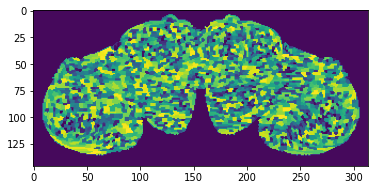

In [11]:
plt.imshow(cluster_model_labels_3d[z,:,:].T)

In [57]:
z=40

#######################
### Load Superslice ###
#######################
### A superslice is a single z-plane but all flies have already been concatenated along an axis of this array
brain_file = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/no_zscored/aggregated_fly/stack{}.npy".format(z)
brain = np.array(np.load(brain_file), copy=True)

#######################
## Load SuperFictrac ##
#######################
fictrac_file = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/no_zscored/aggregated_fly/z{}_pooled_behavior.npy".format(z)
fictrac = np.load(fictrac_file, allow_pickle=True).item()

### Bin bar positions ###
bins = np.arange(-180,181,30)
#neural_z = brain.transpose([2, 0, 1, 3]).reshape(brain.shape[1], brain.shape[2], -1)
neural_z = np.moveaxis(brain,0,-2)
neural_z = np.reshape(neural_z,(314,146,-1))

#heading = fictrac['h']
heading = np.rad2deg(fictrac['h'])
### redefine 0
heading = (heading + 180) % 360 - 180

avg_neural_barposition = []
bin_middle = []
for i in range(len(bins)-1):
    start = bins[i]
    stop = bins[i+1]
    bin_middle.append((start+stop)/2)
    ids = np.where(np.logical_and(heading>start, heading<=stop))[0]
    avg_neural_barposition.append(np.nanmean(neural_z[:,:,ids],axis=2))

slice_z = np.asarray(avg_neural_barposition)

In [32]:
brain.shape

(4, 314, 146, 3384)

In [41]:
brain_concat = np.moveaxis(brain,0,-1)
brain_concat = np.reshape(brain_concat,(314,146,-1))
brain_concat.shape

(314, 146, 13536)

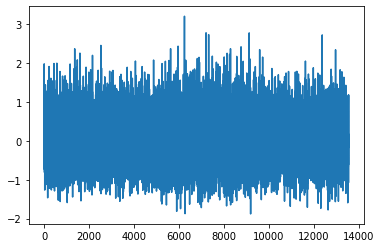

In [42]:
plt.plot(brain_concat[100,40,:])

In [36]:
brain_concat = np.moveaxis(brain,0,-2)
brain_concat = np.reshape(brain_concat,(314,146,-1))
brain_concat.shape

(314, 146, 13536)

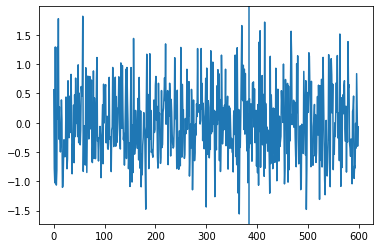

In [43]:
plt.plot(brain_concat[100,40,3000:3600])
plt.axvline(384)

In [38]:
13536/4

3384.0

In [ ]:
neural_z = brain.transpose([2, 0, 1, 3]).reshape(brain.shape[1], brain.shape[2], -1)


In [46]:
a = np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3]])
a.shape
#(fly, time)

(3, 4)

In [48]:
a[1,:]

array([2, 2, 2, 2])

In [49]:
b = np.reshape(a,(-1))
b.shape

(12,)

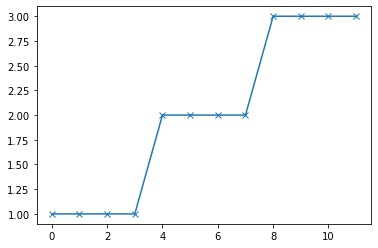

In [53]:
plt.plot(b,marker='x')

In [54]:
a.shape

(3, 4)

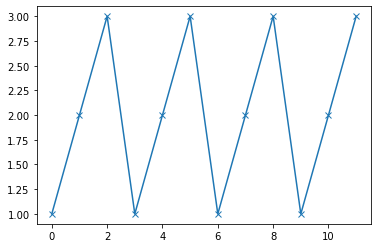

In [56]:
b = np.reshape(a.T,(-1))
b.shape
plt.plot(b,marker='x')

In [24]:
bins

array([-180, -150, -120,  -90,  -60,  -30,    0,   30,   60,   90,  120,
        150,  180])

In [26]:
heading = np.rad2deg(fictrac['h'])
### redefine 0
heading = (heading + 180) % 360 - 180

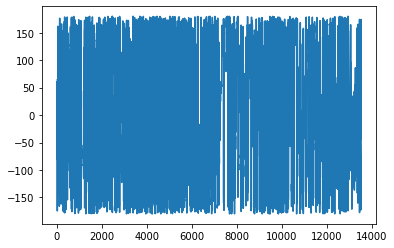

In [27]:
plt.plot(heading)

In [29]:
slice_z.shape

(12, 314, 146)

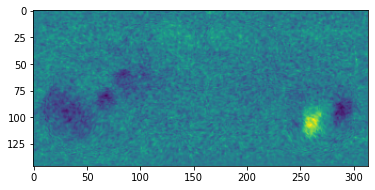

In [60]:
plt.imshow(slice_z[0,:,:].T)

In [66]:
all_slices.shape

(91, 12, 314, 146)

In [5]:
print(all_slices.shape)

(91, 12, 314, 146)


In [6]:
all_slices = all_slices.transpose(1, 2, 3, 0)
# TODO: Figure out the transpose order
all_slices.shape

(12, 314, 146, 91)

In [7]:
all_slices.shape

(12, 314, 146, 91)

In [8]:
np.nanmin(maxs.T[:,:,6])

NameError: name 'maxs' is not defined

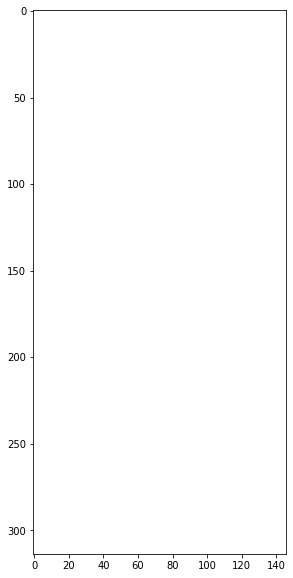

In [9]:
maxs = np.max(all_slices,axis=3)
mins = np.min(all_slices,axis=3)
maxs[np.where(np.abs(mins)>maxs)] = mins[np.where(np.abs(mins)>maxs)]
plt.figure(figsize=(10,10))
plt.imshow(maxs[2,:,:],cmap='seismic')#, vmin=-.7,vmax=.7)

In [14]:
np.shape(maxs)

(12, 314, 146)

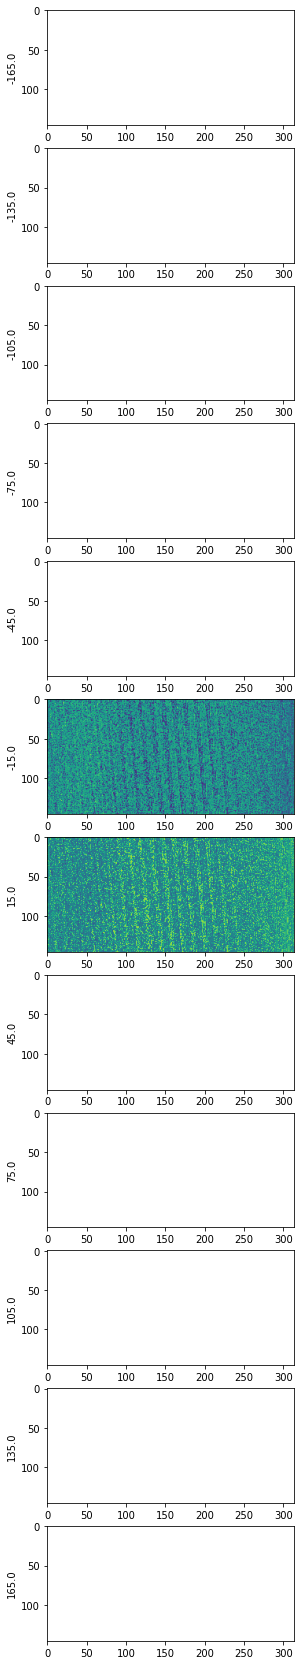

In [10]:
plt.figure(figsize=(10,30))
for i in range(len(maxs)):
    plt.subplot(12,1,i+1)
    #plt.imshow(maxs[i].T,vmin=-0.5,vmax=0.5,cmap='seismic')
    plt.imshow(maxs[i].T)
    plt.ylabel(bin_middle[i])

In [5]:
fixed = brainsss.load_fda_meanbrain()
atlas = brainsss.load_roi_atlas()
explosion_rois = brainsss.load_explosion_groups()
all_rois = brainsss.unnest_roi_groups(explosion_rois)
roi_masks = brainsss.make_single_roi_masks(all_rois, atlas)
roi_contours = brainsss.make_single_roi_contours(roi_masks, atlas)

In [6]:
all_slices.shape

(91, 12, 314, 146)

In [13]:
#warps = brainsss.warp_STA_brain(STA_brain=np.rollaxis(all_slices,3,0), fly='fly_311', fixed=fixed, anat_to_mean_type='myr')
warps = brainsss.warp_STA_brain(STA_brain=np.rollaxis(all_slices,3,0), fixed=fixed, anat_to_mean_type='myr')

TypeError: warp_STA_brain() missing 1 required positional argument: 'fly'

In [ ]:
# np.shape(np.rollaxis(all_slices,3,0))

In [8]:
all_slices.shape

(91, 12, 314, 146)

(array([6.0000000e+02, 4.6639000e+04, 9.5047800e+05, 9.4907410e+06,
        3.7319814e+07, 2.0914960e+06, 1.5212500e+05, 9.4170000e+03,
        3.2800000e+02, 1.0000000e+01]),
 array([-0.28247762, -0.21699771, -0.1515178 , -0.08603789, -0.02055798,
         0.04492193,  0.11040185,  0.17588176,  0.24136166,  0.30684158,
         0.3723215 ], dtype=float32),
 <BarContainer object of 10 artists>)

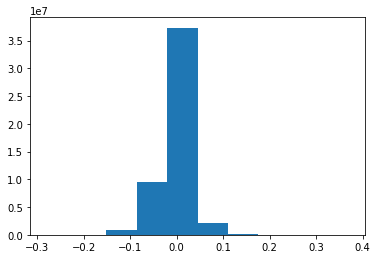

In [7]:
plt.hist(all_slices.flatten())

In [ ]:
# you probably want shape [12,314,146,91]

In [8]:
all_slices = np.moveaxis(all_slices,0,-1)
all_slices.shape

(12, 314, 146, 91)

In [9]:
explosions = []
t0 = time.time()
for angle in range(12):
    input_canvas = np.ones((500,500,3)) #+.5 #.5 for diverging
    data_to_plot = all_slices[angle,:,:,:] # probably remove ::-1
    vmax = np.max(all_slices.flatten())#0.5
    explosion_map = brainsss.place_roi_groups_on_canvas(explosion_rois,
                                                        roi_masks,
                                                        roi_contours,
                                                        data_to_plot,
                                                        input_canvas,
                                                        vmax=vmax,
                                                        cmap='seismic',
                                                        diverging=True)#'hot')
    explosions.append(explosion_map)

In [70]:
# explosions = []
# t0 = time.time()
# for angle in [0]:
#     input_canvas = np.ones((500,500,3)) #+.5 #.5 for diverging
#     data_to_plot = all_slices[angle,:,:,:] # probably remove ::-1
#     vmax = np.max(all_slices.flatten())#0.5
#     explosion_map = brainsss.place_roi_groups_on_canvas(explosion_rois,
#                                                         roi_masks,
#                                                         roi_contours,
#                                                         data_to_plot,
#                                                         input_canvas,
#                                                         vmax=vmax,
#                                                         cmap='seismic',
#                                                         diverging=True)#'hot')
#     explosions.append(explosion_map)

In [10]:
datapath ='/oak/stanford/groups/trc/data/yandan/2P_Imaging/moco_highpass_dff'

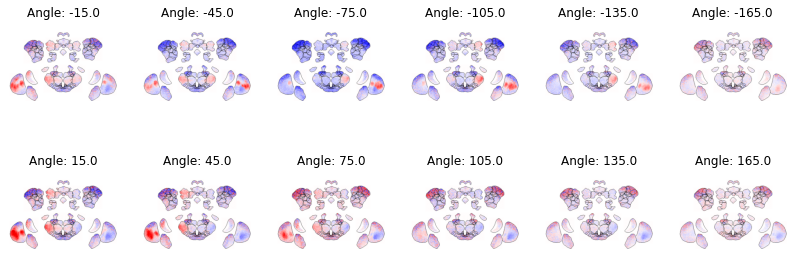

In [11]:
plt.figure(figsize=(14,5))

for k,i in enumerate([5, 4, 3, 2, 1, 0, 6, 7, 8, 9, 10, 11]):
    plt.subplot(2,6,k+1)
    plt.imshow(explosions[i][150:,:])
    plt.title(F"Angle: {bin_middle[i]}")
    plt.axis('off')
    
save_file = os.path.join(datapath, 'figs', '20231101')
plt.savefig(save_file,dpi=300,bbox_inches='tight',transparent=False)

In [ ]:
all_slices = []
for z in range(49):
    print(z)
    slice_neural = neural[:,:,z,:]
    
    #heading_interpolated = interpolate_to_neural(z,timestamps)
    ### redefine 0
    heading_interpolated -= 180
    
    avg_neural_barposition = []
    bin_middle = []
    for i in range(len(bins)-1):
        start = bins[i]
        stop = bins[i+1]
        bin_middle.append((start+stop)/2)
        ids = np.where(np.logical_and(heading_interpolated>start, heading_interpolated<=stop))[0]
        avg_neural_barposition.append(np.mean(slice_neural[:,:,ids],axis=2))
    all_slices.append(np.asarray(avg_neural_barposition))
all_slices = np.asarray(all_slices)

In [ ]:
avg_neural_barposition = []
bin_middle = []
for i in range(len(bins)-1):
    start = bins[i]
    stop = bins[i+1]
    bin_middle.append((start+stop)/2)
    ids = np.where(np.logical_and(heading_interpolated>start, heading_interpolated<=stop))[0]
    avg_neural_barposition.append(np.mean(slice_neural[:,:,ids],axis=2))

In [ ]:
all_slices = np.moveaxis(all_slices,0,3)
all_slices.shape

In [69]:
fixed = brainsss.load_fda_meanbrain()
atlas = brainsss.load_roi_atlas()
explosion_rois = brainsss.load_explosion_groups()
all_rois = brainsss.unnest_roi_groups(explosion_rois)
roi_masks = brainsss.make_single_roi_masks(all_rois, atlas)
roi_contours = brainsss.make_single_roi_contours(roi_masks, atlas)

In [ ]:
warps = brainsss.warp_STA_brain(STA_brain=np.rollaxis(all_slices,3,0), fly='fly_311', fixed=fixed, anat_to_mean_type='myr')

In [ ]:
dataset_path = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_311'

In [ ]:
plt.figure(figsize=(14,5))

for k,i in enumerate([5, 4, 3, 2, 1, 0, 6, 7, 8, 9, 10, 11]):
    plt.subplot(2,6,k+1)
    plt.imshow(explosions[i][150:,:])
    plt.title(F"Angle: {bin_middle[i]}")
    plt.axis('off')
    
save_file = os.path.join(dataset_path, 'figs', '20230614')
plt.savefig(save_file,dpi=300,bbox_inches='tight',transparent=False)

In [2]:
#######################
## Load SuperFictrac ##
#######################
fictrac_file = "/oak/stanford/groups/trc/data/yandan/2P_Imaging/2023August/aggregated_fly/z{}_pooled_behavior.npy".format(z)
fictrac = np.load(fictrac_file).item()

NameError: name 'z' is not defined